# Action list representations

In [107]:
import warnings
import hdbscan
from main import show_label_dist, embedding_approach

warnings.filterwarnings("ignore")

In [8]:
%load_ext autoreload
%autoreload 2

## Overview of action lists

We can take a look at the distributions of action lists for various POS tags using `show_label_dist`. Note that the plots have a log scale on the y-axis, and I have hidden the x tick labels for readability. For the following three examples, the distributions seem to loosely follow Zipf's law; very few frequent action lists and many that occur only 1-3 times.

Note that these are the distribution plots for the already "reduced" action lists (using Kleene-star). Despite this reduction, there still seem to be a high amount of (rare) action lists. 

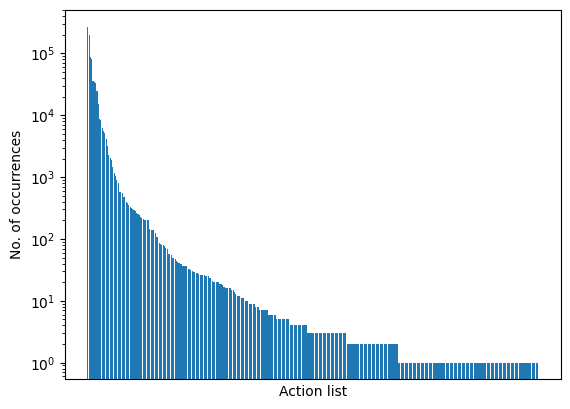

In [15]:
show_label_dist("NOUN")

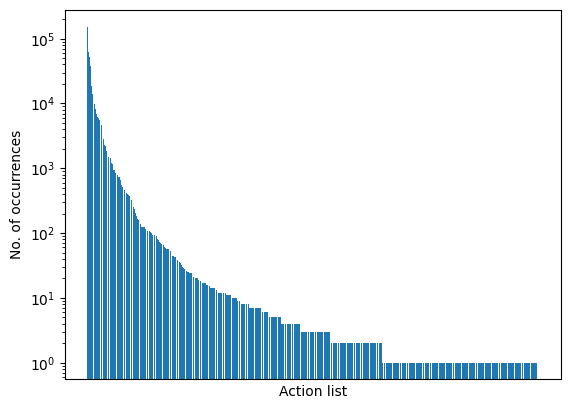

In [16]:
show_label_dist("VERB")

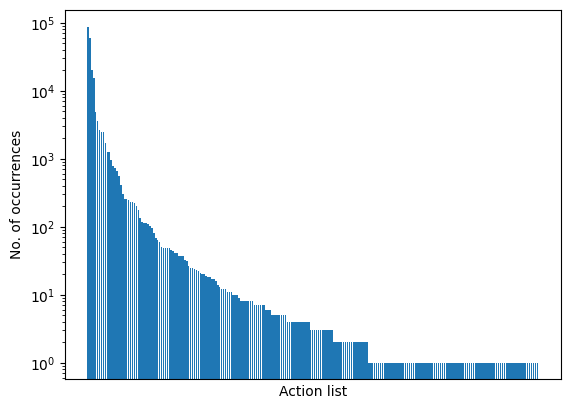

In [17]:
show_label_dist("ADJ")

## Embedding-based Approach

We can attempt to encode these action lists in a meaningful way using sentence embeddings; for each action list, we create a vector using pre-trained sentence embeddings like the popular `all-MiniLM-L6-v2` used in these examples.

We can create these embeddings either from the "sentence" (action list) directly, which will respect the order of the "words" (actions). However, the order of the actions in the given representation of action lists may not be relevant information; as a result, we can attempt to further simplify the lists prior to embedding them by reordering them uniformally.

For example:

`left-arc right-arc reduce` and `reduce left-arc right-arc` are both sorted by their words and thus become `left-arc reduce right-arc`.

The option `order` determines whether or not to respect the order of the action lists before creating the embeddings. The function also currently takes in `n_sentences` in order to limit the amount of sentences' action lists to embed due to runtime issues.

We use dimensionality reduction to get an idea of how the results are spread out for both cases:

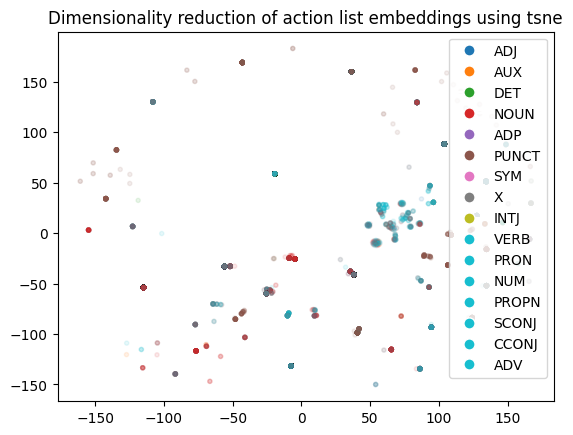

In [113]:
X, X_reduced = embedding_approach(reduction="tsne", n_sentences=500, order=False)

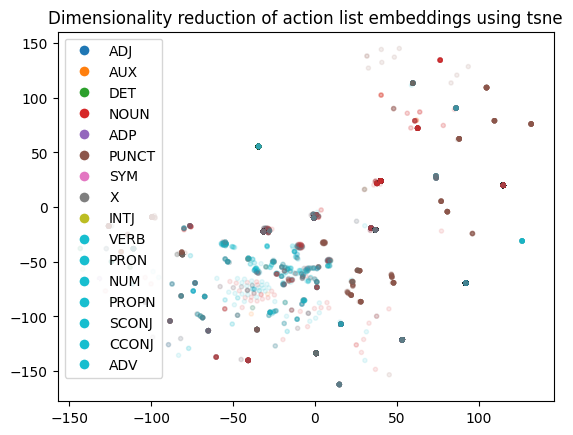

In [114]:
X_o, X_o_reduced = embedding_approach(reduction="tsne", n_sentences=500, order=True)

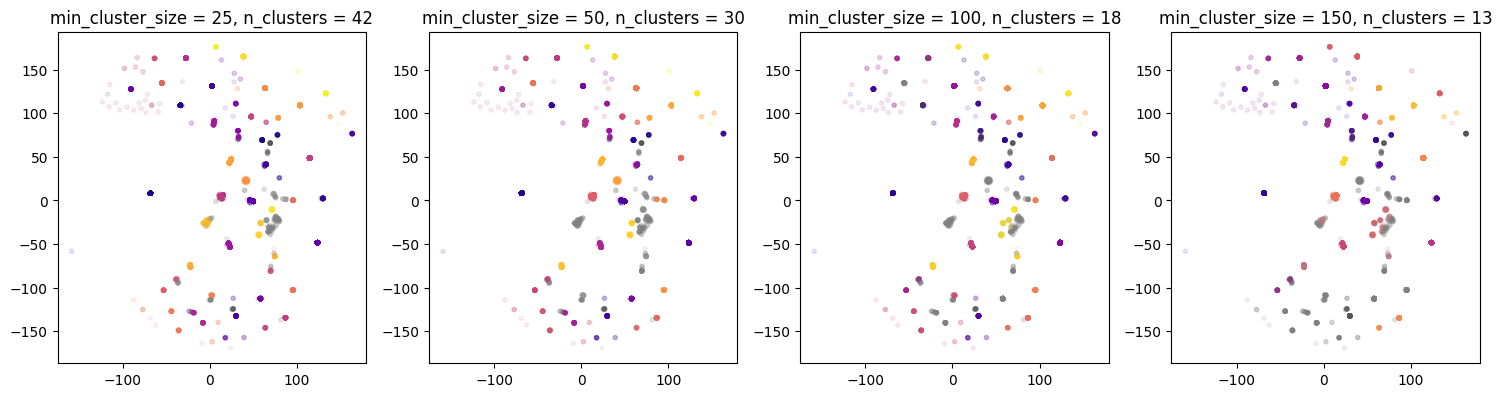

In [109]:
min_cluster_sizes = [25, 50, 100, 150]

fig, axes = plt.subplots(1, len(min_cluster_sizes), figsize=(15, 5))
persistencies = []

for ax, min_cluster_size in zip(axes, min_cluster_sizes):
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit(X)
    n_clusters = len(set(hdb.labels_) - {-1})
    color_palette = sns.color_palette("plasma", n_clusters)
    cluster_colors = [color_palette[x] if x >= 0
                      else (0.5, 0.5, 0.5)
                      for x in hdb.labels_]
    cluster_member_colors = [sns.desaturate(x, p) for x, p in
                             zip(cluster_colors, hdb.probabilities_)]
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_member_colors, marker=".", alpha=0.1)
    ax.set_title(f'min_cluster_size = {min_cluster_size}, n_clusters = {n_clusters}')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

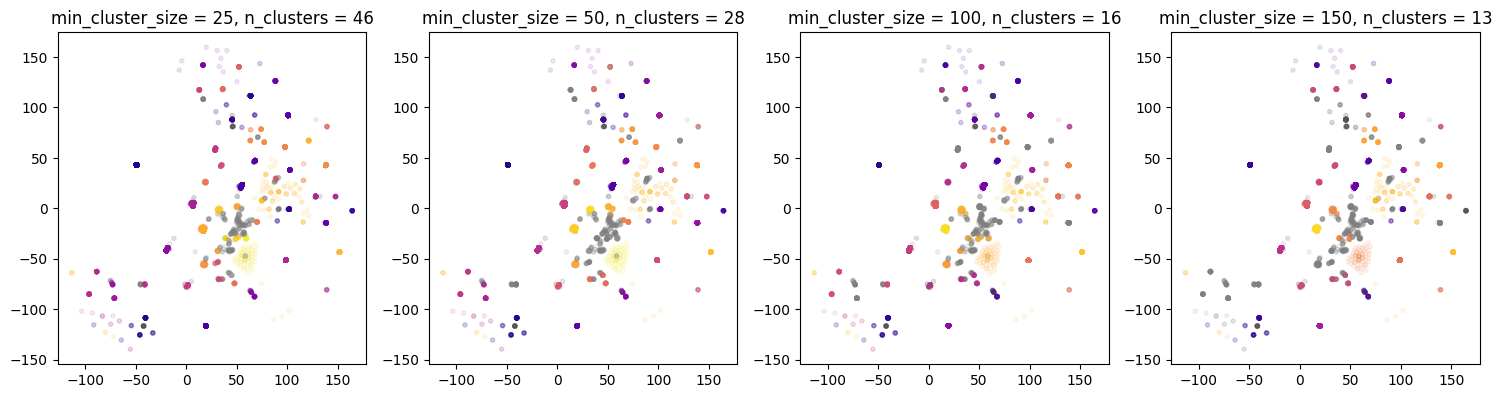

In [110]:
min_cluster_sizes = [25, 50, 100, 150]

fig, axes = plt.subplots(1, len(min_cluster_sizes), figsize=(15, 5))
persistencies = []

for ax, min_cluster_size in zip(axes, min_cluster_sizes):
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit(X_o)
    n_clusters = len(set(hdb.labels_) - {-1})
    color_palette = sns.color_palette("plasma", n_clusters)
    cluster_colors = [color_palette[x] if x >= 0
                      else (0.5, 0.5, 0.5)
                      for x in hdb.labels_]
    cluster_member_colors = [sns.desaturate(x, p) for x, p in
                             zip(cluster_colors, hdb.probabilities_)]
    ax.scatter(X_o_reduced[:, 0], X_o_reduced[:, 1], c=cluster_member_colors, marker=".", alpha=0.1)
    ax.set_title(f'min_cluster_size = {min_cluster_size}, n_clusters = {n_clusters}')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()